<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_grad_methods/Seminar_3_Raiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$$

где $$\hat y_{i} = \Sigma_{i=0}^{k}w_{k}x_{ik}$$

А как метрику можем использовать RMSE

$$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения:

*  Чтобы сдать математику, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали математику будет являться оценка, полученная в конце курса.

*  Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing, load_diabetes

In [ ]:
RANDOM_STATE = 42

In [ ]:
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

col_names = X.columns

X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=col_names)

In [ ]:
X.head()

In [ ]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [ ]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y, bins=30);

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это

In [ ]:
plt.hist(y_train)

In [ ]:
plt.hist(y_test)

## Точное и приближенное решение

Линейную регрессию можно обучать по точной формуле, а можно приближенно (с помощью градиентного спуска).

У точного решения есть недостатки:
* оно считается долго, если данных много
* оно может не посчитаться, если в данных есть линейно-зависимые признаки
* оно есть, только если функция потерь - MSE

Поэтому если данных не много, и мы решаем классическую задачу - используем точное решение.

Во всех остальных случаях - градиентный спуск.

Обучим классическую линейную регрессию по точной формуле и оценим ее качество

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lr = LinearRegression() # точное решение

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_lr)

Оценим переобучение

In [ ]:
y_pred_test = lr.predict(X_test)

r2_score(y_test, y_pred_test)

Переобучения нет :)

## Обучение с помощью градиентного спуска

Первый вариант - стандартный - минимизируем MSE.

In [ ]:
from sklearn.linear_model import SGDRegressor

lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

lr_mse.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)

In [ ]:
pred_test = lr_mse.predict(X_test)

r2_score(y_test, pred_test)

Теперь попробуем минимизировать MAE

### Задание

*  обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  подберите `learning_rate` и `eta0` так, чтобы получить наилучшее качество на тестовых данных


In [ ]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000, learning_rate='optimal') # MAE

In [ ]:
# your code here

In [ ]:
print(f'''MSE loss:
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss:
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [ ]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Интерпретация прогнозов модели

In [ ]:
results = pd.DataFrame({'features' : X_train.columns, 'weights' : lr_mse.coef_})
results = results.sort_values(by='weights')

In [ ]:
results

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

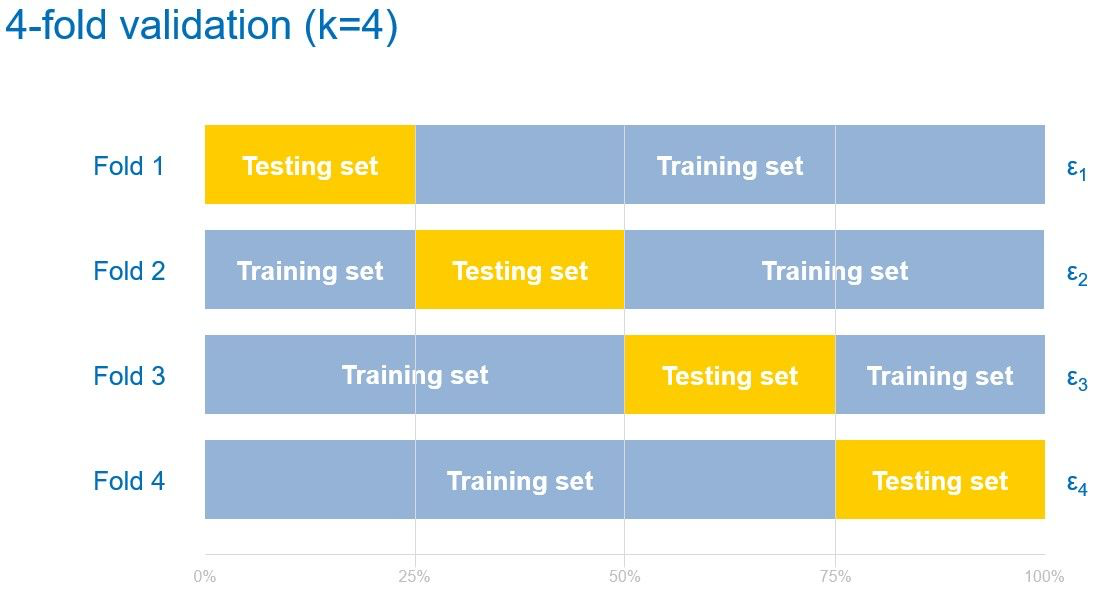

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(lr_mse, X, y, cv=5, scoring='r2').mean()

In [ ]:
cross_val_score(lr_mse, X, y, cv=5, scoring='neg_mean_squared_error').mean()

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков.

Попробуем глазами найти интересные зависимости.

In [ ]:
X.columns

In [ ]:
plt.scatter(X['AveRooms'], y)

Посмотрите для остальных колонок на аналогичные графики зависимости с целевой переменной.

In [1]:
# your code here

Добавим новый признак в данные

In [ ]:
X["MedInc"] = np.where(X["MedInc"] < 0, 0, X["MedInc"])

In [ ]:
X_train['NewInc'] = X_train['MedInc'] ** 0.5
X_test['NewInc'] = X_test['MedInc'] ** 0.5

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [1]:
plt.scatter(X_train['NewInc'], y_train)

### Задание

*  заново обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  выведите на экран важность признаков


In [ ]:
# your code here

Теперь обогатим наше признаковое пространство попарными произведениями признаков

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)

X = poly.transform(X)

In [1]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [1]:
X_train.shape, X_test.shape

In [ ]:
lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

In [ ]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

r2_score(y_test, pred)

-1.4903985299003207e+21

In [ ]:
pred_train = lr_mse.predict(X_train)

r2_score(y_train, pred_train)

-5.324590457833126e+24